In [113]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [115]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost', 
                                     database='digesett', 
                                     user='root', 
                                     password='root')
 
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.27
You're connected to database:  ('digesett',)


In [116]:
#Select of fallecmimientos by day
cursor = connection.cursor()

## executing the statement using 'execute()' method
cursor.execute("SELECT * FROM fallecimientos_tipo")

data = cursor.fetchall()

fallecidos_tipo = pd.DataFrame(data, columns=['Tipo','fallecidos','año'])

fallecidos_tipo

,Tipo,fallecidos,año
0,Colisiones,1179,2016
1,Deslizamientos,391,2016
2,Atropellos,324,2016
3,Estrellamientos,67,2016
4,CaÃ­das desde VehÃ­culos en Movimiento,13,2016
5,Volcaduras de VehÃ­culo,7,2016
6,Colisiones con Animales,12,2016
7,Aplastamiento,0,2016
8,Sin EspecificaciÃ³n,0,2016
9,Colisiones,913,2017


In [117]:
fallecidos_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tipo        54 non-null     object
 1   fallecidos  54 non-null     int64 
 2   año         54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [120]:
fallecidos_tipo['Tipo'].unique()

array(['Colisiones', 'Deslizamientos', 'Atropellos', 'Estrellamientos',
       'CaÃ\xaddas desde VehÃ\xadculos en Movimiento', 'Volcadurass',
       'Colisiones con Animales', 'Aplastamiento', 'Sin Especificación',
       'Caidas', 'Aplastamientos', 'Atropello', 'Deslizamiento',
       'Atropellamiento', 'Estrellamiento', 'CaÃ\xadda', 'Volcaduras',
       'Quemaduras', 'CaÃ\xadda y Atroppellamiento', 'CaÃ\xadda de Arbol'],
      dtype=object)

In [119]:
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('ColisiÃ³n','Colisiones')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Ã³','ó')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Caidass','Caidas')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Atropellamientos','Atropello')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Volcaduras de VehÃ\xadculo','Volcaduras')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Volcadura','Volcaduras')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Caidas y Atroppellamiento','Caida')
fallecidos_tipo['Tipo'] = fallecidos_tipo['Tipo'].str.replace('Caidas de Arbol','Caida')

In [121]:
##TOTAL ANUAL

anual = fallecidos_tipo.groupby(by=['año']).sum()

anual

,fallecidos
año,
2016,1993
2017,1588
2018,1427
2019,2095
2020,1732
2021,1543


In [124]:
anual

,fallecidos,MA
año,,
2016,1993,NaN
2017,1588,1993.0
2018,1427,1588.0
2019,2095,1427.0
2020,1732,2095.0
2021,1543,1732.0


Text(0.5, 1.0, 'fallecidos por accidentes de transtio por año')

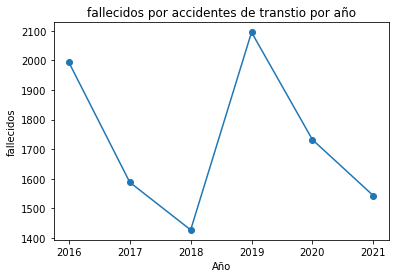

In [122]:
### GRAFICO FALLECIDOS ANUAL
plt.plot(anual.index,anual['fallecidos'],'-o',label="Fallecidos")

plt.xlabel('Año')
plt.ylabel('fallecidos')
plt.title('fallecidos por accidentes de transtio por año')

In [128]:
anual["MA"] = anual['fallecidos'].rolling(window=1).mean().shift(1)
anual

,fallecidos,MA
año,,
2016,1993,NaN
2017,1588,1993.0
2018,1427,1588.0
2019,2095,1427.0
2020,1732,2095.0
2021,1543,1732.0
2022,0,1543.0


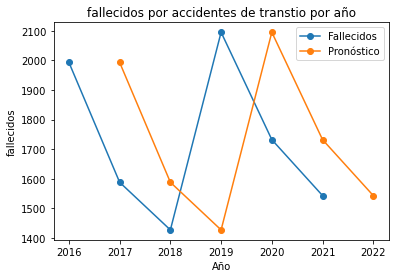

In [147]:
### GRAFICO FALLECIDOS PRONOSTICO
plt.plot(anual[:-1].index,anual['fallecidos'][:-1],'-o',label="Fallecidos")
plt.plot(anual.index,anual['MA'],'-o',label="Pronóstico")

plt.xlabel('Año')
plt.ylabel('fallecidos')
plt.title('fallecidos por accidentes de transtio por año')
plt.legend(loc='best')
plt.show()

In [126]:
anual.loc[2022] = [0,0]
anual

,fallecidos,MA
año,,
2016,1993,NaN
2017,1588,1993.0
2018,1427,1588.0
2019,2095,1427.0
2020,1732,2095.0
2021,1543,1732.0
2022,0,0.0
